# Week7

## Image Recovery (Part 2/2)

The prior knowledge is incorporated here into Restoration in a different way (as a sample of a random field). We'll have knowledge of two random fields and work with those. We'll cover Wiener filters and other type of Estimation models. Also, we'll discuss the Bayesian Inference.

### Weiner Restoration Filter

In order to define the Filter we only need the auto-correlation function of an image and the cross-correlation function between two images or the Fourier transfer, which we refer to as the Power Spectra.
We'll look into stochastic approaches:

Wiener (or Wiener-Kolmogorov) Filter

Bayesian Formulation: ML (Maximum likelihood), MAP, Hierarchical Bayesian.

Let's start with definitions:

Autocorrelation:

$$
R_{f f}(i,j,k,l)=E|f(i,j)f^*(k,l)|
$$

For a good estimationm I need a high number of realizations, i.e. images, (called ensemble). Another good definition is Wide Sense Stationarity $WWS$:

$$
R_{f f}(i,j,k,l)=R_{f f}(i-k,j-l) = R_{f f} (n_1,n_2)
$$

It is irrelevant where the axes are located. I just want to know the distance among the images. The $R_{f f}$ model can be choosen with help of literature. For example, the Isotropic Exponential Decay model:

$$
R(n_1,n_2) = c \cdot \gamma^{-(|n_1|+|n_2|)}
$$

As we usually have a single image, we'll use the notion of Ergodicity, that tells that Ensemble Average equals Spatial Average:

$$
R_{f f}(n_1,n_2)=\lim_{N\rightarrow \infty} \frac{1}{(2N+1)^2} \sum_{k_1=-N}^N \sum_{k_2=-N}^N f(k_1,k_2) f^*(k_1-n_1,k_2-n_2)
$$

Finally, the Power Spectrum (Fourier Transform ($F$) of AutoCorrelation function):

$$
P_{f f} (\omega_1,\omega_2) = F\{ R_{f f}(n_1,n_2) \}
$$

In the Non-Causal Wiener Restoration Filter, one Degradation Model is, with $w$ the additive noise:

$$
y(i,j) = h(i,j) * * f(i,j)+w(i,j)
$$

The objective is to find $\hat{f}$ that minimize the error:

$$
\hat{f}(i,j)=argmin_{f(i,j)} E\left[ |e(i,j)^2| \right] =argmin_{f(i,j)} E\left[ |f(i,j)-\hat{f}(i,j)|^2 \right] 
$$

We need the expectation $E$ because $f$ is the realization of a random field of 2d random process... so we need a parameter for all the realizations. Consider an LSI restoration filter $r$ for which the error is the least as possible one:

$$
\hat{f}(i,j) = r(i,j)* * y(i,j) 
$$

If $f(i,j)$ is $WSS$ with Autocorrelation $R_{f f}(i,j)$ :

$$
R_{yy}(i,j)=R_{f f}(i,j)* * h(i,j)* * h^* (-i,-j)
$$

$$
P_{yy}(\omega_1,\omega_2)=|H(\omega_1,\omega_2)|^2 \cdot P_{f f}(\omega_1,\omega_2)
$$

Cross-Correlations input-output and output-input are: respectively:

$$
R_{fy}(i,j)=R_{f f}(i,j)* * h^* (-i,-j) \hspace{2cm} P_{fy}(\omega_1,\omega_2)=H^*(\omega_1,\omega_2) \cdot P_{f f}(\omega_1,\omega_2)
$$


$$
R_{yf}(i,j)=R_{f f}(i,j)* * h(i,j) \hspace{2cm} P_{y f}(\omega_1,\omega_2)=H(\omega_1,\omega_2) \cdot P_{f f}(\omega_1,\omega_2)
$$

The Wiener Restoration Filter has $f(i,j)$ and $w(i,j)$ which are WSS. It is based on Orthogonally Principle: the Error is Orthogonal to the data:

$$
E\left[ e(i,j) y^*(k,l) \right] = 0
$$

which leads to:

$$
R_{f y}(i,j)=R_{yy}(i,j)* * r(i,j) \hspace{1cm} R(\omega_1, \omega_2)=\frac{P_{fy}(\omega_1,\omega_2)}{P_{yy}(\omega_1,\omega_2)}
$$

Common assumptions are that $f(i,j)$ and $w(i,j)$ are uncorrelated, therefore $E|f(i,j)w^*(i,j)|=E|f(i,j)| \cdot E|w^*(i,j)|$. The other assumption is that both $f(i,j)$ and $w(i,j)$, i.e. image and noise, are zero mean. These will give:

$$
P_{f y}(\omega_1,\omega_2)=H^*(\omega_1,\omega_2) \cdot P_{f f}(\omega_1,\omega_2)
$$

and

$$
P_{y y}(\omega_1,\omega_2)=|H(\omega_1,\omega_2)|^2 \cdot P_{f f}(\omega_1,\omega_2) + P_{w w} (\omega_1, \omega_2)
$$

Eventually:

$$
R(\omega_1, \omega_2) = \frac{H^*(\omega_1,\omega_2) \cdot P_{f f}(\omega_1,\omega_2)}{|H(\omega_1,\omega_2)|^2 \cdot P_{f f}(\omega_1,\omega_2) + P_{w w} (\omega_1, \omega_2)}
$$


### Wiener v.s. Constrained Least-Squares Restoration Filter 

They differ only in one term: the Stabilizing Term. If we model Power Spectra (function of stabilizing term) and use the white and gaussian model, the results of Wiener and CLS becomes identical. If noise is white, we have:

$$
R(\omega_1, \omega_2) = \frac{H^*(\omega_1,\omega_2) }{|H(\omega_1,\omega_2)|^2  + \frac{P_{w w} (\omega_1, \omega_2)}{P_{f f}(\omega_1,\omega_2)}} = \frac{H^*(\omega_1,\omega_2) }{|H(\omega_1,\omega_2)|^2  + \frac{\sigma^2_{w w} }{P_{f f}(\omega_1,\omega_2)}}
$$

The CLS was instead:

$$
R_{CLS}(\omega_1, \omega_2) = \frac{H^*(\omega_1,\omega_2) }{|H(\omega_1,\omega_2)|^2  + \alpha | C(\omega_1,\omega_2)|^2}
$$

That means, by substitution, that we get identity if:
$$
\alpha = \sigma^2_{ww} \hspace{2cm} |C(\omega_1,\omega_2)|^2=\frac{1}{P_{f f} (\omega_1,\omega_2)}
$$

$|C|^2$ and $1/P$ are magnitudes of frequency response of High Pass Filter.

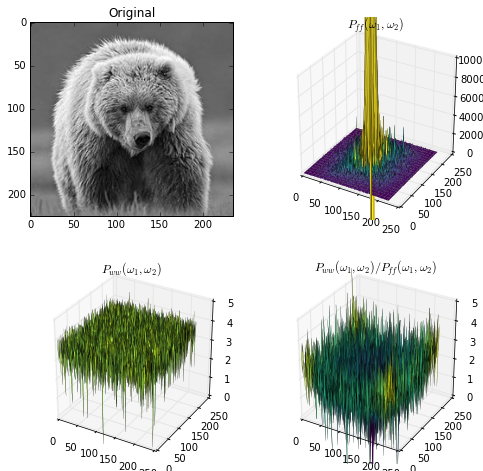

In [2]:
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal, misc, ndimage
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
from PIL import ImageFilter
import skimage
import cv2

I = misc.imread(os.path.join('media','bear.png') );
# read in the original, sharp and noise-free image
original = misc.imread(os.path.join('media','bear.png') , mode='L').astype(float)/255
H = np.size(original,0)
W = np.size(original,1)
x = range(W)
y = range(H)
[X, Y] = np.meshgrid(x,y)
whitenoise = np.random.rand(H,W)

Pff = np.power(np.abs(np.fft.fftshift(np.fft.fft2(original))),2)
Pww = np.power(np.abs(np.fft.fftshift(np.fft.fft2(whitenoise))),2)

fig=plt.figure(figsize=(8, 8))
ax1=plt.subplot(2, 2, 1)
plt.imshow(original,cmap='gray')
plt.title('Original')

ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(Y,X,Pff, vmin=0, vmax=1e3, cmap='viridis', linewidth=0.1)
plt.title('$P_{ff}(\omega_1,\omega_2)$')
ax2.set_zlim([0, 1e4]);

ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_surface(Y,X,np.log10(Pww), vmin=0, vmax=4, cmap='viridis', linewidth=0.1)
plt.title('$P_{ww}(\omega_1,\omega_2)$')
ax3.set_zlim([0, 5]);

ax4 = fig.add_subplot(224, projection='3d')
ax4.plot_surface(Y,X,np.log10(Pww/Pff), vmin=0, vmax=3, cmap='viridis', linewidth=0.1)
plt.title('$P_{ww}(\omega_1,\omega_2)/P_{ff}(\omega_1,\omega_2)$')
ax4.set_zlim([0, 5]);


If we compare Wiener Filter with CLS (CLS with iteration), we see they are similar at low frequencies, but the CLS has higheer values at higher frequencies. With CLS direct, values at high values are lower, but still higher (producing a noiser and sharper image) than in Weiner. Also ISNR is mostly negative when using CLS.


### Noise smoothing problem

Case when imulse response of blurring filter is equal to dimensional $\delta (i,j)$ (instead of $h(i,j)$). This is an optimal smoothing filter (restoration).

$$
h(i,j)=\delta(i,j) \hspace{2cm} H(\omega_1,\omega_2) = 1
$$

therefore, with Wiener:

$$
R(\omega_1, \omega_2) = \frac{1 }{1  + \frac{P_{w w} (\omega_1, \omega_2)}{P_{f f}(\omega_1,\omega_2)}} = \frac{P_{f f}(\omega_1,\omega_2)}{P_{w w} (\omega_1, \omega_2)+P_{f f}(\omega_1,\omega_2)}
$$

If we call $g(i,j)$ the output of the LSI in Wiener Restoration Filter, we get:

$$
P_{g g}(\omega_1,\omega_2) = |H(\omega_1,\omega_2)|^2 \cdot P_{ff} (\omega_1,\omega_2)
$$

and, substituting $R$ in Wiener Filter, we obtain:

$$
R(\omega_1, \omega_2) = \frac{P_{gg}(\omega_1,\omega_2) }{P_{gg}(\omega_1,\omega_2)  + P_{w w} (\omega_1, \omega_2)} \cdot \frac{1}{H(\omega_1,\omega_2)}
$$

These are basically two Filters, where the 1st term is Noise Smoothing Wiener and the 2nd is the Inverse of LSI in the frequency domain. 

Let's look at the Spatially Adaptive Wiener.

$$
y(i,j)=f(i,j)+w(i,j)
$$

and

$$
E[w(i,j)]=0 \hspace{2cm} P_{ww}(\omega_1,\omega_2) = \sigma_w^2
$$

and

$$
R(\omega_1,\omega_2) = \frac{P_{f f}(\omega_1,\omega_2)}{P_{f f}(\omega_1,\omega_2)+\sigma^2_w}
$$

To the image $y$ the mean $m$ will be subtracted.

Other restoration Filters are present in literature, such as the Geometric Mean Filter:

$$
R(\omega_1, \omega_2) = \left( \frac{H^*(\omega_1, \omega_2) }{|H(\omega_1, \omega_2)|^2}\right)^\alpha \left( \frac{H^*(\omega_1, \omega_2)}{|H(\omega_1, \omega_2)|^2+\gamma \frac{P_{w w}(\omega_1,\omega_2)}{P_{f f}(\omega_1,\omega_2)}} \right)
$$

which feels like an enhancement problem, given the fact that $\alpha$ and $\gamma$ need to be chosen.

Now we want to adapt the Wiener to the spatially Adaptive. For each region, we use $f(i,j)=m_f+\sigma_f \cdot v(i,j)$. For each of these regions, I'll have:

$$
R(\omega_1, \omega_2) = \frac{\sigma^2_f}{\sigma^2_f+\sigma^2_w} \hspace{3cm} r(i,j) = \frac{\sigma^2_f}{\sigma^2_f+\sigma^2_w} \cdot \delta
$$

We mean before and after regional $r$ and obtain:

$$
p(i,j) = \frac{\sigma^2_f}{\sigma^2_f+\sigma^2_w} \cdot y(i,j) + \frac{\sigma^2_w}{\sigma^2_f+\sigma^2_w} \cdot m_f (i,j)
$$

which is a convex combination of two Filters. With No noise $\sigma^2_w=0$, $p=y$. In the edges, $\sigma_f>>\sigma_w$, which is also $p=y$. In the flat regions $\sigma_f << \sigma_w$, which leads to $p=m_f$


### Bayesian Restoration Algorithms

Sometimes we are interested in the estimate of the posterior. We saw already that ML and MAP result in close forms solutions, but it depends on the form and the noise model in the image prior. Also, we assumed the image and noise were assumed. Also, in the non blind problem, we assumed we knew the blur function. Instead of these assumptions we can now use the Hierarchical Bayesian Paradigm, by forming a joint distribution that looks like:

$$
p(f,h,\Omega,y)=p(y|f,h,\Omega) p(f|\Omega) p(h|\Omega) p(\Omega)
$$

with $\Omega$ Hyperparameters (random variables) that give a certain $p(\Omega)$, the likelihood $p(y|f,h,\Omega)$ i.e. the observation model, the image prior $p(f|\Omega)$ and the blur prior $p(h|\Omega)$. Now, the inference on $f$, $h$, $\Omega$ is based on:

$$
p(f,h,\Omega|y)=\frac{p(y|f,h,\Omega) p(f|\Omega) p(h|\Omega) p(\Omega)}{p(y)}
$$

It's called Hierarchical because in the first stage we model the noise, the original image and the degradation system, and in the second stage we model the Hyper parameters through these hyperpriors. There are many ways to do that, by maximizing the posterior (we find an optimization for each parameter) using ML, MAP, or by using MonteCarlo...


Another image Prior Models is the Total Variation (TV) Image Prior, used a lot because it preserves the edges. When it comes to the Blur, SAR Blur Prior is commonly used. A blind restoration example was shown.



### Maximum Likelihood and Maximum A Posteriori Estimation

To derive ML and MAP, we need to get a stochastic estimation of image and noise. For that we need pdf's, that represent the Prior knowledge. Based on Bayes, our Prior knowledge is modified by the likelihood function, which represents the most probable image that gives rise to the observed data to form the pdf of the original image after the degradated image was observed (Posterior). If the likelihood function is maximized, ie if no image Prior model is used, a maximum likelihood estimate of the original image results. If on the other hand, the posterior is maximized then a map estimation results. 
The degradation model has been:

$$
y=Hf+w
$$

and use model $w=y-Hf$. With Multivariate Gaussian noise, we have:

$$
p(w)=p(y|f)=\frac{1}{(2\pi)^{N/2}|C_{ww}|^{1/2}} exp \left[ -\frac{1}{2}(y-Hf)^T C^{-1}_{w w}(y-Hf) \right]
$$

with white noise, the Covariance is $const \cdot I$.

Prior Knowledge restricts the solution space. With SAR (Simultaneous Autoregressive) Image Prior we have

$$
p(f) \propto \alpha^{N/2} exp \left[ -\frac{1}{2} \alpha f^T C^T C f \right]
$$

When the energy is small (high frequency in the image has low intensity), we have a small number inside the exponential and therefore a high probability. Let's see the Joint Distribution:

$$
p(f,y) = p(y|f)p(f) \hspace{2cm} p(y,f) = p(f|y)p(f)
$$

Bayes Theorem holds: 

$$
p(f|y)=\frac{p(y|f)p(f)}{p(y)}
$$

where $p(f)$ is the Prior and $p(y|f)$ is the likelihood.
ML maximizes the likelihood. MAP maximizes the posterior $p(f|y)$. If I apply ML Restoration, I eventually come up with:

$$
f_{ML} = (H^T C{-1}_{ww} H)^+ H^T C^{-1}_{ww}y
$$

with white noise, I'll obtain the same expression as with Least Square restoration in deterministic fashion:

$$
f_{ML}=(H^TH)^+ H^T y
$$

For MAP restoration, we have:

$$
f_{MAP} = (H^T C{-1}_{ww} H + \alpha C^T C)^+ H^T C^{-1}_{ww}y
$$

with white noise, I'll obtain the same expression as with the Constraint Least Square restoration in deterministic fashion:

$$
f_{MAP}=(H^TH+\frac{\alpha}{\beta}C^T C)^+ H^T y
$$


### Other Restoration Applications

We'll see 4 of them: Image Super-Resolution, Video Super-Resolution, PanSharpening and Dual Exposure Problem. The basic idea under Super-Resolution is that the scene somewhat shifts (globally or locally) with respect to the camera/videocamera. The shift can be subpixel shifted, therefore we need to build a high resolution version of the image. If $x$ is the HR image and $y$ is the collection of the LR observed images, I have:

$$
y_k=A H_k C(s_k) x + n_k = B_k (s_k) x +n_k
$$

$A$ is the downsampling, $H$ is the PSF, $C$ is the Motion Warping and $n$ is the noise. With video, we could say: 

$$
Y_i=DBC(d_{i,k}) X_k + n_{i,k}
$$

for time $i$, frame $k$. $d$ refers to a local shift. $B$ is blur, $D$ is downsampling, $n$ is Gaussian noise. 

Sometimes the video is Compressed: HR video first acquired by a camera. With an acquisition model, the LR video is observed. This is input to a compression system, which produces a LR compressed video, and also information generated by the Coder, and information is Quantization and Sparse Motion Field. The objective is to get the original data, hence this is an Inverse Problem!

Let's discuss the Acquisition Model for the PasSharpening Problem (it is also a Super-Resolution model). MultiSpectral images are $y_b$, but a Spectral Decimator is generated (each image is downsampled) and a Panchromatic image $x$ is given, so that:

$$
x=\sum^{B}_{b-1} \lambda_b y_b +v \hspace{2cm} Y_b = DHy_b +n_b
$$

$H$ is blur (if it is unknown, it is a blind problem) and $D$ is downsampling. 

An the Dual Exposure Problem the idea is to have a Long (color loss, sharp, ligh, blurry) and a Short Exposure images. The Acquisition Model has 2 models: for long and for short exposure image. For Long and short respectively:

$$
y_l = Hx+n_l
$$

and

$$
y_2=\lambda_1 C x + \lambda_2 y_1
$$

